In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

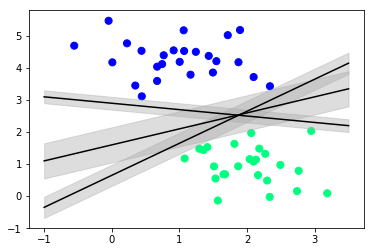

In [2]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

xfit=np.linspace(-1,3.5)
#for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
#    plt.plot(xfit,m*xfit+b,'k')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',
                     alpha=0.4)

In [1]:

model=SVC(kernel='linear')
model.fit(X,y)



[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


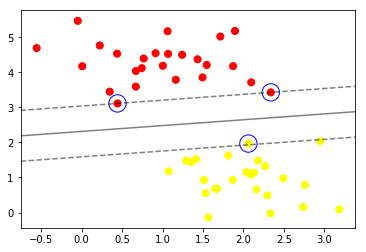

In [3]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
#    绘制决策边界
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,
               linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth=1,edgecolors='blue',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)
print(model.support_vectors_)